# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
from keras.callbacks import EarlyStopping

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'CNN_architecture2'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

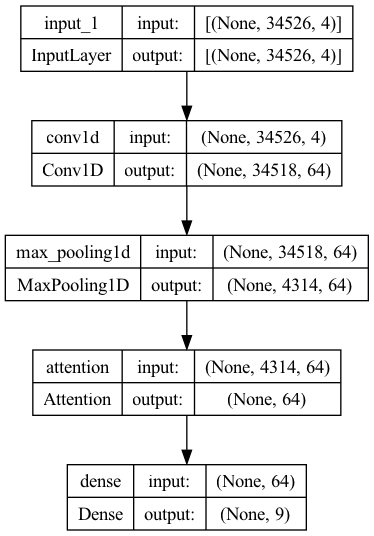

In [4]:
model = CNN(input_size=(max_seq_len, 4),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34526, 4)]        0         
                                                                 
 conv1d (Conv1D)             (None, 34518, 64)         2304      
                                                                 
 max_pooling1d (MaxPooling1  (None, 4314, 64)          0         
 D)                                                              
                                                                 
 attention (Attention)       (None, 64)                5280      
                                                                 
 dense (Dense)               (None, 9)                 585       
                                                                 
Total params: 8169 (31.91 KB)
Trainable params: 8169 (31.91 KB)
Non-trainable params: 0 (0.00 Byte)
___________________________

In [7]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train,
                                 callback=[EarlyStopping(monitor='loss', patience=3)])

KeyboardInterrupt: 

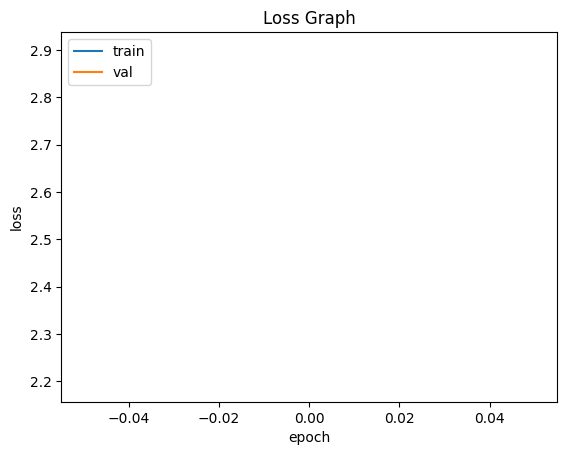

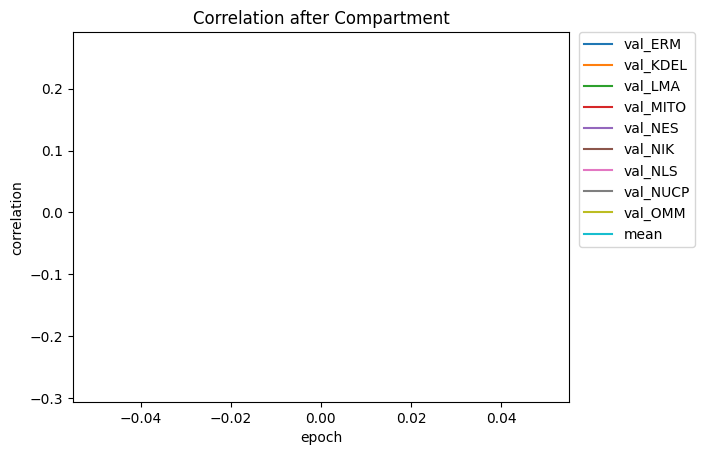

In [7]:
import matplotlib.pyplot as plt
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [8]:
#model.print_model(model_architecture_path)
model.save_model(model_output_path)

In [5]:
model.model.load_weights(model_output_path)

In [6]:
param_dataLoader_valid = {
    'padding_length': max_seq_len,
    'batch_size': 32,
    'shuffle': False,
    'struct': False
}
model.fit(valid_data, param_dataLoader_valid)

78/78 [==============================] - 9s 111ms/step - loss: 2.2847 - ERM: 0.0944 - KDEL: 0.1191 - LMA: 0.0187 - MITO: 0.1549 - NES: 4.5462e-04 - NIK: 0.0418 - NLS: -0.0096 - NUCP: 0.0784 - OMM: 0.0135
